# Plot instability threshold

In [1]:
import numpy as np
import scipy.optimize
import scipy.interpolate
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd

mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 3.5
mpl.rcParams['ytick.minor.size'] = 3.5
mpl.rcParams['xtick.major.width'] = 1.1
mpl.rcParams['ytick.major.width'] = 1.1
mpl.rcParams['xtick.minor.width'] = .8
mpl.rcParams['ytick.minor.width'] = .8
mpl.rcParams['legend.fontsize'] = 14
#xtick.major.size     : 3.5      # major tick size in points
#xtick.minor.size     : 2      # minor tick size in points
#xtick.major.width    : 0.8    # major tick width in points
#xtick.minor.width    : 0.6    # minor tick width in points
%matplotlib inline

In [2]:
result_db_file = 'data/alfven_instability.csv'
# result_db_file = 'data/alfven_instability_thtc4.csv'
# result_db_file = 'data/alfven_instability_tctp1_thtc6.csv'

column_list = ['betap', 'vcva', 'tctp', 'thtc', 'vac', 
               'max_growth_rate', 'kz_peak', 'kp_peak', 'theta_peak']
if os.path.exists(result_db_file):
    df = pd.read_csv(result_db_file)
else:
    df = pd.DataFrame(columns= column_list)

In [3]:
df['k_peak'] = np.sqrt(df.kz_peak**2 + df.kp_peak**2)

In [4]:
df[df.betap ==.6]

,betap,vcva,tctp,thtc,vac,max_growth_rate,kz_peak,kp_peak,theta_peak,k_peak
37,0.6,4.1,2,6,0.0001,0.000898,0.195,1.77,83.7,1.780709
38,0.6,4.2,2,6,0.0001,0.001870,0.195,1.87,84.0,1.880140
39,0.6,4.5,2,6,0.0001,0.005100,0.195,1.98,84.4,1.989579
40,0.6,4.8,2,6,0.0001,0.008210,0.196,2.02,84.5,2.029487
41,0.6,5.0,2,6,0.0001,0.010500,0.195,2.12,84.7,2.128949


In [5]:
betap_arr = df.betap.unique()
vcva_arr_1 = np.zeros_like(betap_arr)
vcva_arr_2 = np.zeros_like(betap_arr)
theta_arr_1 = np.zeros_like(betap_arr)
theta_arr_2 = np.zeros_like(betap_arr)
k_arr_1 = np.zeros_like(betap_arr)
k_arr_2 = np.zeros_like(betap_arr)

target_gamma_1 = 1e-3
target_gamma_2 = 1e-2

In [6]:
betap_arr

array([ 0.05,  0.1 ,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ,  0.7 ,  0.8 ,
        0.9 ,  1.  ])

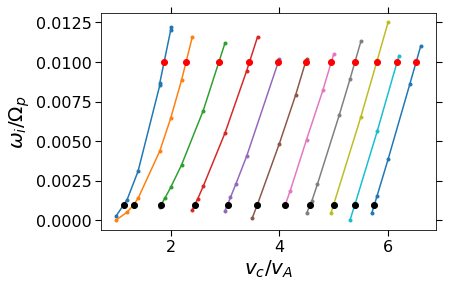

In [7]:
for i, betap in enumerate(betap_arr):
    df_betap = df[df.betap == betap]
    
    # interpolate drift-growth rate curve
    fvc = scipy.interpolate.interp1d(df_betap.max_growth_rate, df_betap.vcva, kind='slinear')
    ftheta = scipy.interpolate.interp1d(df_betap.max_growth_rate, df_betap.theta_peak, kind='slinear')
    fk = scipy.interpolate.interp1d(df_betap.max_growth_rate, df_betap.k_peak, kind='slinear')    
    plt.plot(df_betap.vcva, df_betap.max_growth_rate, 'o-', markersize = 3)
    
    vcva_arr_1[i] = fvc(target_gamma_1)
    vcva_arr_2[i] = fvc(target_gamma_2)
    theta_arr_1[i] = ftheta(target_gamma_1)
    theta_arr_2[i] = ftheta(target_gamma_2)
    k_arr_1[i] = fk(target_gamma_1)
    k_arr_2[i] = fk(target_gamma_2)
    
    plt.plot(vcva_arr_1[i], target_gamma_1, 'ko')
    plt.plot(vcva_arr_2[i], target_gamma_2, 'ro')
    
    
plt.xlabel(r'$v_c/v_A$')
plt.ylabel(r'$\omega_i/\Omega_p$')
plt.show()

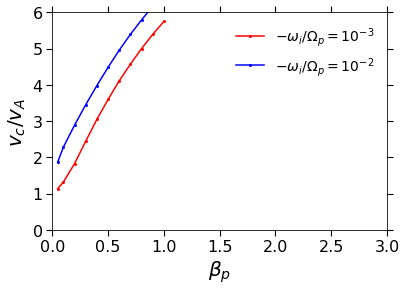

In [8]:
plt.plot(betap_arr, vcva_arr_1, 'ro-', markersize = 2, label = r'$-\omega_i/\Omega_p = 10^{-3}$')
plt.plot(betap_arr, vcva_arr_2, 'bo-', markersize = 2, label = r'$-\omega_i/\Omega_p = 10^{-2}$')

plt.xlabel(r'$\beta_p$')
plt.ylabel(r'$v_c/v_A$')
plt.xlim([0, 3])
plt.ylim([0, 6])
plt.legend(frameon=False)
plt.show()

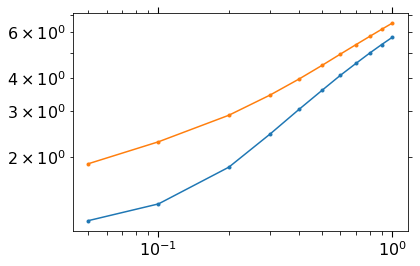

In [9]:
plt.plot(betap_arr, vcva_arr_1, '.-')
plt.plot(betap_arr, vcva_arr_2, '.-')
plt.xscale('log')
plt.yscale('log')

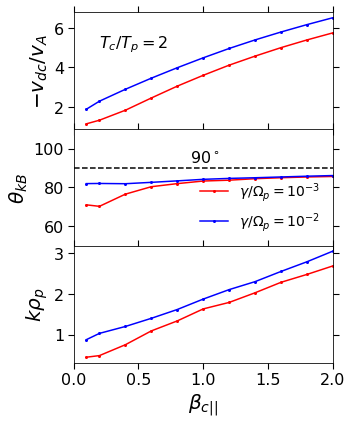

In [10]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize = [5, 6], gridspec_kw={'hspace':.0, 'wspace':0})
i = 0
ax = axes[i]
ax.plot(betap_arr*2, vcva_arr_1, 'ro-', markersize = 2, label = r'$-\omega_i/\Omega_p = 10^{-3}$')
ax.plot(betap_arr*2, vcva_arr_2, 'bo-', markersize = 2, label = r'$-\omega_i/\Omega_p = 10^{-2}$')
ax.set_ylabel(r'$-v_{dc}/v_A$')
ax.text(0.2, 5, r'$T_c/T_p=2$', fontsize=16)
i = 1
ax = axes[i]
ax.plot(betap_arr*2, theta_arr_1, 'ro-', markersize = 2, label = r'$\gamma/\Omega_p = 10^{-3}$')
ax.plot(betap_arr*2, theta_arr_2, 'bo-', markersize = 2, label = r'$\gamma/\Omega_p = 10^{-2}$')
ax.set_ylabel(r'$\theta_{kB}$')
ax.set_ylim([50, 110])
ax.axhline(90, linestyle='dashed', color = 'k')
ax.text(0.9, 93, r'$90^\circ$', fontdict={'fontsize':16})
ax.legend(frameon=False)

i = 2
ax = axes[i]
ax.plot(betap_arr*2, k_arr_1, 'ro-', markersize = 2, label = r'$\gamma/\Omega_p = 10^{-3}$')
ax.plot(betap_arr*2, k_arr_2, 'bo-', markersize = 2, label = r'$\gamma/\Omega_p = 10^{-2}$')
ax.set_ylabel(r'$k\rho_p$')
ax.set_xlabel(r'$\beta_{c||}$')
ax.set_xlim([0, 2])
plt.tight_layout()
# plt.savefig('figure/alfven_instability_max_growing_modes_betacpar.png', dpi = 200)
plt.show()

In [69]:
!open figure/alfven_instability_max_growing_modes.png

In [61]:
# np.save('data/alfven_instability_threhold_tctp=2_thtc=6_vac=0.0001', np.array([betap_arr, vcva_arr_1, vcva_arr_2]))

# whistler instability threshold inferred from Gary et al. 1994

$$\frac{q_e}{q_{max}}= \frac{5}{3}\frac{n_c}{n_e}\frac{v_{dc}}{v_{Tc}}\left(\frac{T_{\parallel h}}{T_{\parallel c}}-1\right)$$

Let $T_h = 6T_c$ then  
$$ \frac{v_{dc}}{v_{Tc}} = \frac{3}{25}\frac{n_e}{n_c}\frac{q_e}{q_{max}}$$

$$ \frac{v_{dc}}{v_{A}} = \frac{v_{Tc}}{v_{Tp}}\frac{v_{Tp}}{v_A}\frac{3}{25}\frac{n_e}{n_c}\frac{q_e}{q_{max}}$$

$$ \frac{v_{dc}}{v_{A}} = 43\sqrt{\frac{T_c}{T_p}\beta_p}\frac{3}{25}\frac{n_e}{n_c}\frac{q_e}{q_{max}}$$

$$ \frac{v_{dc}}{v_{A}} = 43\sqrt{\frac{T_c}{T_p}\beta_p}\frac{3}{25}\frac{n_e}{n_c}\frac{0.15}{\sqrt{2}\beta_{\parallel c}^{0.88}}$$

$$ \frac{v_{dc}}{v_{A}} = \sqrt{2\beta_p}\frac{129}{25}\frac{n_e}{n_c}\frac{0.15}{\sqrt{2}2^{0.88}\beta_{p}^{0.88}}$$

$$ \frac{v_{dc}}{v_{A}} = \frac{129}{25}\frac{n_e}{n_c}\frac{0.15}{2^{0.88}\beta_{p}^{0.38}}$$

$$ \frac{v_{dc}}{v_{A}} = \frac{n_e}{n_c}\frac{0.42}{\beta_{p}^{0.38}}$$

In [18]:
129/25 

5.16

In [16]:
def f_vcva_whistler_01(beta_arr):
    return 1/0.95 * 0.42 / beta_arr**0.38
def f_vcva_whistler_1999(beta_arr):
    return 1/0.95 * 2.8 / beta_arr**0.3

In [17]:
betap_arr_01 = np.linspace(0.1, 3, 20)
vcva_whistler_01 = f_vcva_whistler_01(betap_arr_01)
vcva_whistler_1999 = f_vcva_whistler_1999(betap_arr_01)

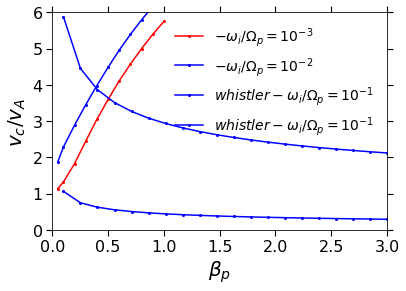

In [18]:
plt.plot(betap_arr, vcva_arr_1, 'ro-', markersize = 2, label = r'$-\omega_i/\Omega_p = 10^{-3}$')
plt.plot(betap_arr, vcva_arr_2, 'bo-', markersize = 2, label = r'$-\omega_i/\Omega_p = 10^{-2}$')
plt.plot(betap_arr_01, vcva_whistler_01, 'bo-', markersize = 2, label = r'$whistler -\omega_i/\Omega_p = 10^{-1}$')
plt.plot(betap_arr_01, vcva_whistler_1999, 'bo-', markersize = 2, label = r'$whistler -\omega_i/\Omega_p = 10^{-1}$')

plt.xlabel(r'$\beta_p$')
plt.ylabel(r'$v_c/v_A$')
plt.xlim([0, 3])
plt.ylim([0, 6])
plt.legend(frameon=False)
plt.show()

# Differnt Tc/Tp ratio

In [11]:
file_tctp1 = 'data/alfven_instability_threhold_tctp=1_thtc=6_vac=0.0001.npy'
file_tctp2 = 'data/alfven_instability_threhold_tctp=2_thtc=6_vac=0.0001.npy'
file_tctp05 = 'data/alfven_instability_threhold_tctp=05_thtc=6_vac=0.0001.npy'

In [12]:
betap_1, gamma_1 = np.load(file_tctp1)
betap_2, _, gamma_2,= np.load(file_tctp2)
betap_05, gamma_05 = np.load(file_tctp05)

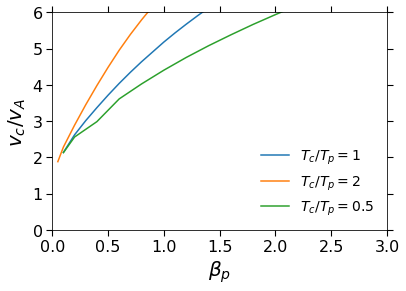

In [13]:
plt.plot(betap_1, gamma_1, label = r'$T_c/T_p=1$')
plt.plot(betap_2, gamma_2, label = r'$T_c/T_p=2$')
plt.plot(betap_05, gamma_05, label = r'$T_c/T_p=0.5$')

plt.xlabel(r'$\beta_p$')
plt.ylabel(r'$v_c/v_A$')
plt.xlim([0, 3])
plt.ylim([0, 6])
plt.legend(frameon=False)
plt.show()

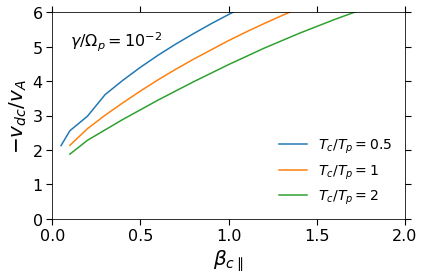

In [14]:
plt.plot(betap_05*.5, gamma_05, label = r'$T_c/T_p=0.5$')
plt.plot(betap_1, gamma_1, label = r'$T_c/T_p=1$')
plt.plot(betap_2*2, gamma_2, label = r'$T_c/T_p=2$')

plt.xlabel(r'$\beta_{c\parallel}$')
plt.ylabel(r'$-v_{dc}/v_A$')
plt.xlim([0, 2])
plt.ylim([0, 6])
plt.text(0.1, 5, r'$\gamma/\Omega_p=10^{-2}$', fontsize=16)
plt.legend(frameon=False)
plt.tight_layout()
# plt.savefig('figure/alfven_core_drift_threshold.png', dpi=200)

In [16]:
qe_alfven_tctp1 = 25/129 * 0.95 /np.sqrt(betap_1) * gamma_1
qe_alfven_tctp2 = 25/129 * 0.95 /np.sqrt(betap_2 * 2) * gamma_2
qe_alfven_tctp05 = 25/129 * 0.95 /np.sqrt(betap_05 * 0.5) * gamma_05

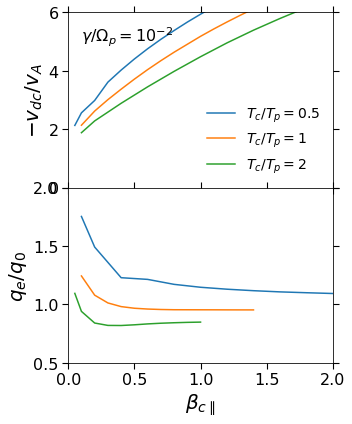

In [28]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=[5, 6], gridspec_kw={'hspace':.0, 'wspace':0})

ax = axes[0]
ax.plot(betap_05*.5, gamma_05, label = r'$T_c/T_p=0.5$')
ax.plot(betap_1, gamma_1, label = r'$T_c/T_p=1$')
ax.plot(betap_2*2, gamma_2, label = r'$T_c/T_p=2$')

ax.set_ylim([0, 6])
ax.text(0.1, 5, r'$\gamma/\Omega_p=10^{-2}$', fontsize=16)
ax.legend(frameon=False)
ax.set_ylabel(r'$-v_{dc}/v_A$')


ax = axes[1]
ax.set_xlim([0, 2])
ax.set_ylim([0.5, 2])
ax.plot(betap_05, qe_alfven_tctp05)
ax.plot(betap_1, qe_alfven_tctp1)
ax.plot(betap_2, qe_alfven_tctp2)
ax.set_ylabel(r'$q_e/q_0$')
ax.set_xlabel(r'$\beta_{c\parallel}$')


plt.tight_layout()
# plt.savefig('figure/alfven_vcva_qeq0_thresholds.png', dpi=200)